# Using the EXBA tools

This notebook shows how to use the tools available in the EXBA class.
It uses the `lightkurve` package as base.

In [1]:
import os, sys, glob
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import lightkurve as lk

%matplotlib inline
path = os.path.dirname(os.getcwd()) 

sys.path.append(path)
from exba import EXBA, EXBACollection

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## EXBA object

Create and EXBA object for a given Kepler channel and quarter by combining the 4 TPFs available per channel.

The EXBA object has the following attributes:
* tpfs: A TPFCollection of the original data
* time: an array with the JD of observation
* row: arrays with coordinates in pixel space
* col: arrays with coordinates in pixel space
* ra: arrays with coordinates in world space
* dec: arrays with coordinates in world space
* flux: array with flux values per pixel
* sources: list of (clean) Gaia sources present in the images

In [2]:
exba = EXBA(channel=53, quarter=17)

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
INFO: Query finished. [astroquery.utils.tap.core]


### Plotting stitched image

<AxesSubplot:xlabel='R.A. [deg]', ylabel='Dec [deg]'>

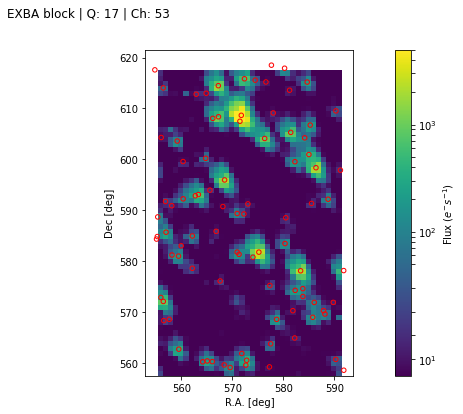

In [3]:
exba.plot_image()

### Compute photometry

This implements a simple square aperture photometry, it creates an object attribute named `self.sap_lcs`, a `lk.LightCurveCollection` object with time series for all Gaia sources.

Each light curve is a `lk.LightCurve` object and inherit all its methods and attributes.

In [4]:
exba.simple_aperture_phot()

Simple SAP flux:   0%|          | 0/1286 [00:00<?, ?it/s]

In [6]:
exba.sap_lcs

LightCurveCollection of 91 objects:
	Gaia DR2 2130161770018123776 (1 KeplerLightCurves) Quarters: 17
	Gaia DR2 2130161770018135424 (1 KeplerLightCurves) Quarters: 17
	Gaia DR2 2130161770018138112 (1 KeplerLightCurves) Quarters: 17
	Gaia DR2 2130161774314345088 (1 KeplerLightCurves) Quarters: 17
	Gaia DR2 2130161774314348160 (1 KeplerLightCurves) Quarters: 17
	Gaia DR2 2130161873097352320 (1 KeplerLightCurves) Quarters: 17
	Gaia DR2 2130161873099556480 (1 KeplerLightCurves) Quarters: 17
	Gaia DR2 2130161877393574912 (1 KeplerLightCurves) Quarters: 17
	Gaia DR2 2130161877393585408 (1 KeplerLightCurves) Quarters: 17
	Gaia DR2 2130161877396580608 (1 KeplerLightCurves) Quarters: 17
	Gaia DR2 2130161907457125760 (1 KeplerLightCurves) Quarters: 17
	Gaia DR2 2130161907457142528 (1 KeplerLightCurves) Quarters: 17
	Gaia DR2 2130161907457820672 (1 KeplerLightCurves) Quarters: 17
	Gaia DR2 2130161907457822848 (1 KeplerLightCurves) Quarters: 17
	Gaia DR2 2130161911753345024 (1 KeplerLightCurves) Qu

In [7]:
exba.sap_lcs[1]

time,flux,flux_err
,electron / s,electron / s
object,float64,float64
2456392.2262641042,727.748046875,3.6006061997243135
2456392.2466980326,716.6510620117188,3.5995868551757577
2456392.267132061,719.9932861328125,3.600036297721131
2456392.2875661897,724.4734497070312,3.6005108470861953
2456392.3080001185,725.4405517578125,3.600355363896443
2456392.3284341474,730.4110107421875,3.600699695831429
2456392.3488682765,727.1429443359375,3.6004831678613947
2456392.3693022057,724.3250122070312,3.6003103334393707


## Plotting light curves and stamps

The EXBA object as a method that plot a single or multiple (list of targets) light curves, image data and the used photometric aperture. 

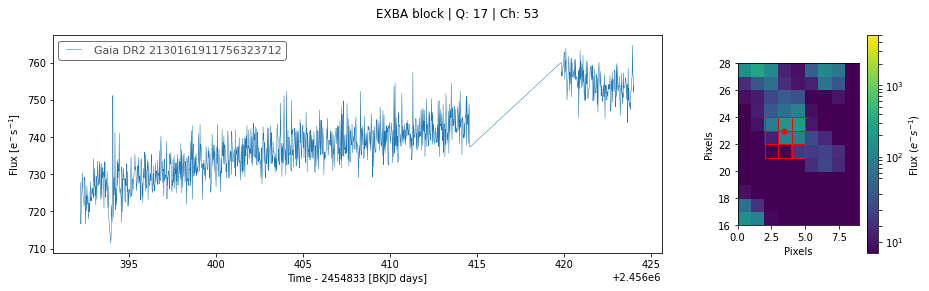

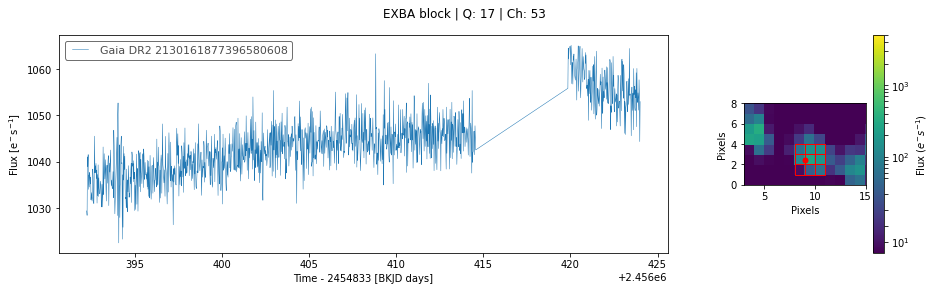

In [8]:
test = ['Gaia DR2 2130161911756323712', 'Gaia DR2 2130161877396580608']
exba.plot_lightcurves(object_id=test)

# Using multiple quarters

To compute light curves of multiple quarters for a given channel, first we create a list of EXBA objects for all quarters available in the dataset.

We can plot the images in WCS space

In [9]:
exbas = [EXBA(channel=53, quarter=q) for q in [5,6,9,10,13,14,17]]

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


[<AxesSubplot:xlabel='R.A. [deg]', ylabel='Dec [deg]'>,
 <AxesSubplot:xlabel='R.A. [deg]', ylabel='Dec [deg]'>,
 <AxesSubplot:xlabel='R.A. [deg]', ylabel='Dec [deg]'>,
 <AxesSubplot:xlabel='R.A. [deg]', ylabel='Dec [deg]'>,
 <AxesSubplot:xlabel='R.A. [deg]', ylabel='Dec [deg]'>,
 <AxesSubplot:xlabel='R.A. [deg]', ylabel='Dec [deg]'>,
 <AxesSubplot:xlabel='R.A. [deg]', ylabel='Dec [deg]'>]

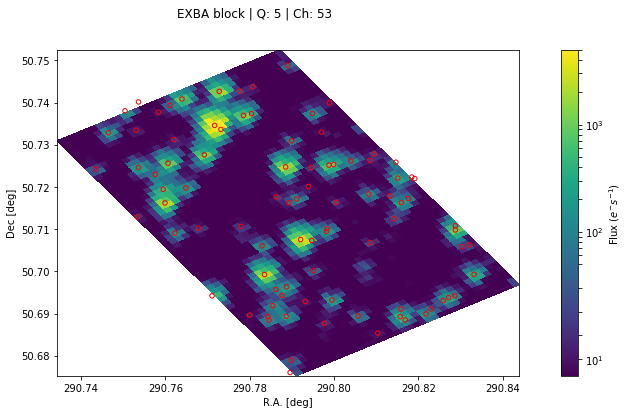

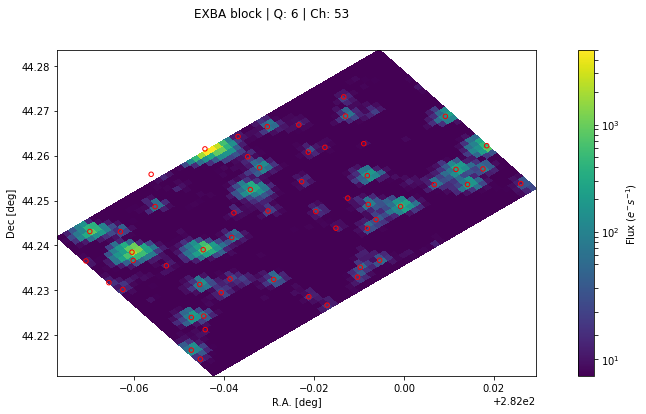

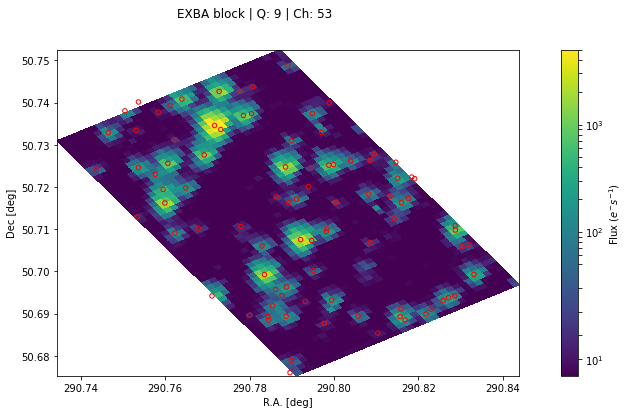

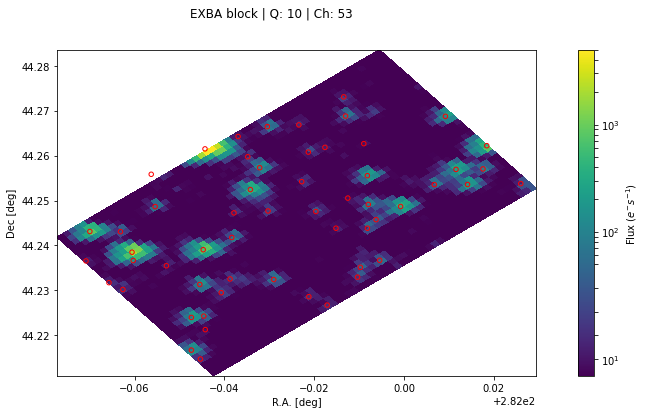

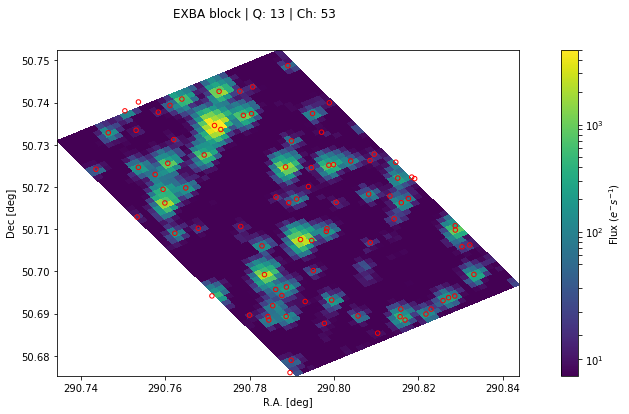

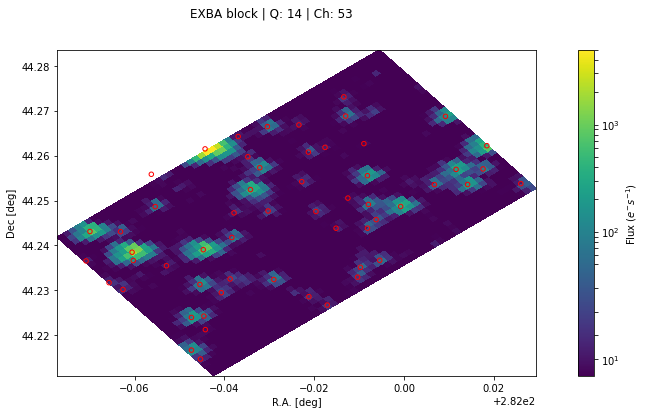

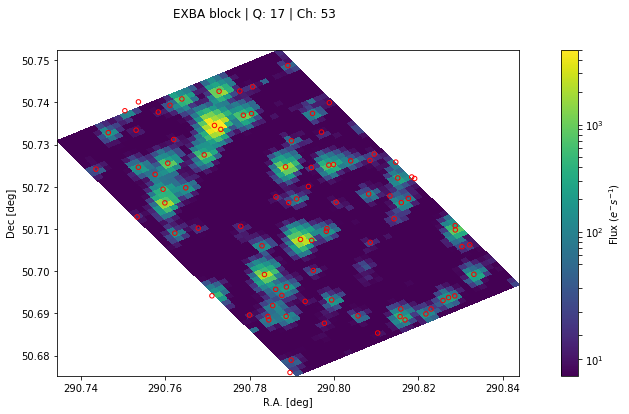

In [10]:
[exba.plot_image(space='wcs') for exba in exbas]

We now compute the light curves for all sources and quarters

In [12]:
for exba in exbas:
    exba.simple_aperture_phot()

Simple SAP flux:   0%|          | 0/4492 [00:00<?, ?it/s]

Simple SAP flux:   0%|          | 0/4276 [00:00<?, ?it/s]

Simple SAP flux:   0%|          | 0/4618 [00:00<?, ?it/s]

Simple SAP flux:   0%|          | 0/4447 [00:00<?, ?it/s]

Simple SAP flux:   0%|          | 0/4252 [00:00<?, ?it/s]

Simple SAP flux:   0%|          | 0/4344 [00:00<?, ?it/s]

Simple SAP flux:   0%|          | 0/1286 [00:00<?, ?it/s]

## EXBA Collection

To stitch light curves of the same objects across quarters we create an `EXBACollection` object, a subclass of `EXBA`.
This object has an attributes that contains a list of `lk.LightCurveCollection` objects per Gaia sources.

In [13]:
exba_lcc = EXBACollection(exbas)
exba_lcc

EXBA Patch:
	 Channel 53, Quarter [5, 6, 9, 10, 13, 14, 17], Gaia sources 147

We can access a Gaia sources by indexing the attribute `.sources`. Each element of this list has the same methods as the `lk.LightCurveCollection` class, such as `.plot()` and `.stitch()`.

time,flux,flux_err
,,
object,float64,float64
2455276.490507761,0.9802959966950752,0.004623087679823633
2455276.5109418947,0.9812070302926172,0.0046229022845977194
2455276.531375828,0.9763065728334172,0.0046225805009306965
2455276.551809862,0.9760577717529998,0.004622543211246358
2455276.572243996,0.985681343851147,0.0046234042500153455
2455276.59267793,0.9872111033344871,0.004623427379157819
2455276.613111964,0.9770819541757523,0.004622975822141228
2455276.6335460986,0.9828016944056315,0.00462293680941171


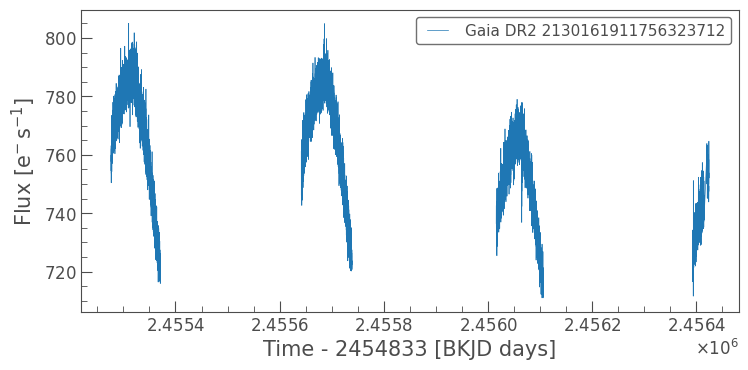

In [17]:
exba_lcc.sources[1].plot()
exba_lcc.sources[1].stitch()